In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

В файле Singers.xlsx находится список песен в исполнении различных певцов, а также продолжительность звучания каждой песни. Вычислите общее количество песен в исполнении Эминема и среднюю продолжительность звучания его песен. При добавлении новых данных все формулы должны обновляться автоматически.

In [7]:
singers = pd.read_excel('~/Study/excel/Ch25/Practice Files/Singers.xlsx',
                        skiprows=3, usecols=range(5,7), names=['singer', 'play'])

In [14]:
singers.head()

,singer,play
0,Eminem,2
1,Eminem,5
2,Cher,4
3,Eminem,4
4,Moore,4


In [13]:
singers.groupby('singer').agg(['count', 'mean']).loc['Eminem']

play  count    5.0
      mean     3.8
Name: Eminem, dtype: float64

В файле Tableexample.xlsx включите в лист ранг для каждого продавца согласно общей выручке и количеству проданных единиц товара. При добавлении новых данных ранги должны обновляться автоматически. Вероятно, стоит воспользоваться функцией РАНГ. Ее синтаксис в данном случае: РАНГ(число;массив;0). Эта функция возвращает ранг числа в массиве. У самого большого числа ранг равен 1.

In [21]:
table = pd.read_excel('~/Study/excel/Ch25/Practice Files/Tableexample.xlsx',
                        skiprows=4, usecols=range(4,8)).dropna()

In [38]:
table.assign(Rank=lambda x: x[['Revenue', 'Units']].apply(tuple, axis=1)
                                                   .rank(method='dense', ascending=False).astype(int))

,Name,Units,Revenue,Unit price,Rank
0,John,814.0,39886.0,49.0,1
1,Adam,594.0,26136.0,44.0,4
2,Dixie,528.0,13200.0,25.0,6
3,Tad,806.0,20956.0,26.0,5
4,Erica,826.0,27258.0,33.0,3
5,Gabrielle,779.0,28044.0,36.0,2
6,Amanda,400.0,5000.0,12.5,7


На основе данных в файле Stock.xlsx создайте гистограммы для ежемесячных доходов от акций GE и Intel.

In [2]:
stocks = pd.read_excel('~/Study/excel/Ch41/Practice Files/Stock.xlsx',
                        sheet_name='stockprices', skiprows=50, usecols=range(6))

In [49]:
stocks

,Date,Microsoft,GE,Intel,GM,CSCO
0,1990-03-30,0.121519,0.040486,0.037267,0.022284,0.010753
1,1990-04-30,0.047404,-0.003891,-0.053892,-0.035422,0.010638
2,1990-05-31,0.258621,0.083516,0.221519,0.115819,0.042105
3,1990-06-29,0.041096,0.005445,-0.025907,-0.020566,0.070707
4,1990-07-31,-0.125000,0.034296,-0.053191,-0.020997,-0.037736
...,...,...,...,...,...,...
125,2000-08-31,0.000000,0.140948,0.121948,0.276619,0.048711
126,2000-09-29,-0.136079,-0.014711,-0.444908,-0.099567,-0.194900
127,2000-10-31,0.141969,-0.049837,0.082707,-0.044231,-0.024887
128,2000-11-30,-0.166969,-0.095781,-0.153722,-0.195171,-0.111369


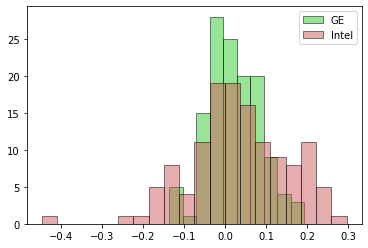

In [58]:
plt.hist(stocks["GE"], color='limegreen', alpha=0.5, 
         edgecolor="black", bins=10) 
plt.hist(stocks["Intel"], color='indianred', alpha=0.5, 
         edgecolor="black", bins=20)
plt.legend(["GE", 'Intel']);

В файле Deming.xlsx содержатся измерения диаметра (в дюймах) для 500 стержней, произведенных компанией Rodco, согласно отчету руководителя производства. Допустимый размер диаметра стержня составляет не менее 1дюйма. Раньше диаметрам стержней, производимых компанией Rodco, соответствовала симметричная гистограмма.
- Постройте гистограмму для этих измерений.
- Прокомментируйте любые необычные аспекты этой гистограммы.
Можно ли догадаться, что вызвало необычный вид гистограммы? (Подсказка: один из 14 принципов управления качеством Эдварда Деминга гласит: "Искорените страх".)

In [62]:
deming = pd.read_excel('~/Study/excel/Ch41/Practice Files/Deming.xlsx',
                       usecols=[1], names=['diameter'])

In [64]:
deming.head()

,diameter
0,1.005872
1,1.004461
2,1.011128
3,1.012668
4,1.018356


Правило Стёрджеса — эмпирическое правило определения оптимального количества интервалов, на которые разбивается наблюдаемый диапазон изменения случайной величины при построении гистограммы плотности её распределения. 

$${\displaystyle n=1+\lfloor \log _{2}N\rfloor }$$

In [94]:
n = 1 + int(3.321 * np.log10(len(deming))) # Формула Стерджеса через десятичный логарифм

In [9]:
get_nbins = lambda x: 1 + int(3.321 * np.log10(len(x)))

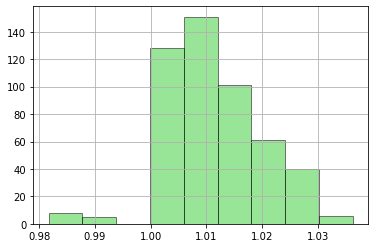

In [95]:
deming.diameter.hist(bins=n, color='limegreen', alpha=0.5, edgecolor='black');

В файле Unemployment.xlsx file находятся данные об уровне безработицы в США. Создайте на их основе гистограмму. Гистограмма уровня безработицы симметричная или асимметричная?

In [98]:
unemployment = pd.read_excel('~/Study/excel/Ch41/Practice Files/Unemployment.xlsx',
                             skiprows=3, usecols=range(2,6))

In [100]:
unemployment.head()

,Year,Month,Rate
0,1948,1,3.4
1,1948,2,3.8
2,1948,3,4.0
3,1948,4,3.9
4,1948,5,3.5


In [107]:
get_nbins = lambda x: 1 + int(3.321 * np.log10(len(x)))
n = get_nbins(unemployment)

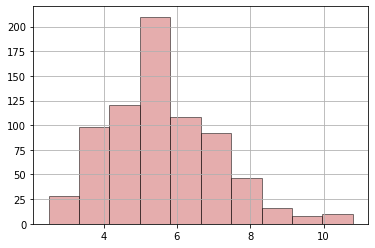

In [102]:
unemployment.Rate.hist(bins=n, color='indianred', alpha=0.5, edgecolor='black');

In [121]:
stats.skew(unemployment.Rate) # небольшая положительная асимметрия

0.5854259517217653

В файле Teams.xlsx содержатся данные о засчитанных пробежках в высшей баскетбольной лиге за сезон. Создайте на их основе гистограмму. Гистограмма, представляющая засчитанные пробежки, симметричная или асимметричная?

In [103]:
teams = pd.read_excel('~/Study/excel/Ch41/Practice Files/teams.xlsx',
                             skiprows=3, usecols=range(2,5))

In [105]:
teams.head()

,Year,Runs
0,2000,864
1,2000,794
2,2000,792
3,2000,978
4,2000,950


Цвета для графиков https://www.colorhexa.com/add8e6

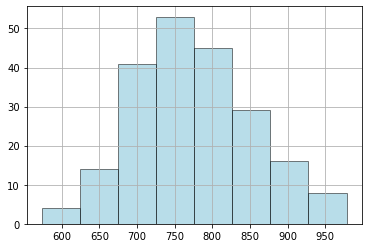

In [111]:
n = get_nbins(teams)
teams.Runs.hist(bins=n, color='#72bcd4', alpha=0.5, edgecolor='black');

In [117]:
import scipy.stats as stats

In [119]:
stats.skew(teams.Runs) # асимметрия отсутствует

0.17261131893063947

В файле NFLpoints.xlsx содержатся данные об очках, заработанных командами Национальной футбольной лиги за сезон. Создайте на их основе гистограмму. Гистограмма, представляющая заработанные очки, симметричная или асимметричная?

In [112]:
NFLpoints = pd.read_excel('~/Study/excel/Ch41/Practice Files/NFLpoints.xlsx',
                             skiprows=4, usecols=range(2,5))

In [115]:
NFLpoints.head()

,Rk,Tm,Pts
0,2003,Kansas City Chiefs,484
1,2003,Indianapolis Colts,447
2,2003,St. Louis Rams,447
3,2003,Green Bay Packers,442
4,2003,Tennessee Titans,435


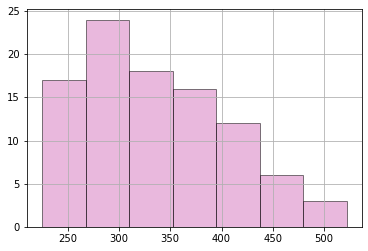

In [116]:
n = get_nbins(NFLpoints)
NFLpoints.Pts.hist(bins=n, color='#d472bc', alpha=0.5, edgecolor='black');

In [120]:
stats.skew(NFLpoints.Pts) # асимметрия со смещением вправо

0.4280836273050147

Получите описательную статистику для данных о доходности акций Intel и GE в файле Stock.xlsx.

In [4]:
stocks[['Intel', 'GE']].describe()

,Intel,GE
count,130.000000,130.000000
mean,0.032085,0.021175
std,0.118607,0.063657
min,-0.444908,-0.136511
25%,-0.031078,-0.020504
50%,0.027711,0.012955
75%,0.118150,0.064851
max,0.295267,0.192392


Компания City Power&Light производит оборудование для регулировки напряжения в Нью-Йорке и отправляет его в Чикаго. Регулятор напряжения считается годным, если он поддерживает напряжение от 25 до 75 вольт. Напряжение, поддерживаемое каждым устройством, измеряется в Нью-Йорке перед отправкой. После доставки оборудования в Чикаго напряжение измеряется снова. Результаты замеров напряжения в каждом городе приведены в файле Citypower.xlsx.
- С помощью описательной статистики прокомментируйте то, что вы узнали о поддерживаемом регуляторами напряжении до и после доставки.
- Каков процент годных устройств до и после доставки?
- Выскажите предложения по повышению качества регуляторов напряжения, производимых компанией City Power&Light.
- Какое значение напряжения было превышено десятью процентами регуляторов при измерении в Нью-Йорке?
- Какое значение напряжения не было превышено пятью процентами регуляторов при измерении в Нью-Йорке?

In [5]:
power = pd.read_excel('~/Study/excel/Ch42/Practice Files/Citypower.xlsx', skiprows=2, usecols=range(1,3))

In [7]:
power.describe()

,NY,CHICAGO
count,217.000000,217.000000
mean,50.179493,28.826590
std,8.051620,17.358888
min,30.050000,0.910000
25%,45.500000,15.590000
50%,50.000000,26.490000
75%,55.500000,37.440000
max,71.090000,87.800000


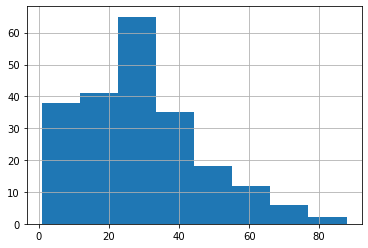

In [11]:
power['CHICAGO'].hist(bins=get_nbins(power['CHICAGO']));

In [27]:
power['CHICAGO'].apply(lambda x: 25 <= x <= 75).sum() / len(power) * 100 # % исправных изделий

53.91705069124424

In [104]:
# 90-й и 5-й процентили
power['NY'].quantile(.9), power['NY'].quantile(.05)

(61.02, 35.81)

В файле Decadeincome.xlsx приведены примеры доходов (в тысячах долларов 1980 г.) для нескольких семей в 1980 и 1990 гг. Предположим, что эти семьи являются репрезентативными для США. Республиканцы утверждают, что в 1990 г. страна стала богаче, чем в 1980 г., поскольку средний доход семьи увеличился. Согласны ли вы с этим утверждением?

In [30]:
incomes = pd.read_excel('~/Study/excel/Ch42/Practice Files/Decadeincome.xlsx', skiprows=1, usecols=range(1,3))

In [32]:
incomes.describe() # средний доход увеличился, но медианный уменьшился

,Income 1980,Income 1990
count,102.000000,102.000000
mean,46.666667,48.382353
std,38.178666,46.113086
min,1.000000,-3.000000
25%,17.750000,16.250000
50%,34.000000,32.500000
75%,70.750000,68.750000
max,165.000000,190.000000


С помощью описательной статистики сравните годовые доходы по акциям, казначейским векселям и корпоративным облигациям. Данные см.в файле Historicalinvest.xlsx.

In [42]:
invest = pd.read_excel('~/Study/excel/Ch42/Practice Files/Historicalinvest.xlsx', skiprows=6, usecols=range(4)) \
           .dropna()

### Среднее геометрическое

$$G(x_{1},x_{2},\ldots ,x_{n})={\sqrt[ {n}]{x_{1}x_{2}\cdots x_{n}}}=\left(\prod _{{i=1}}^{n}x_{i}\right)^{{1/n}}$$

Для использования среднего геометрического при вычислении среднего годового дохода от инвестиций, необходимо добавить 1 к каждому годовому доходу и взять среднее геометрическое от получившихся в результате чисел. Затем вычесть 1 из результата и получить оценку среднего годового дохода по акции.

In [102]:
# среднее геометрическое доходностей
invest.loc[:, ['Stocks', 'T.Bills', 'T.Bonds']].apply(lambda x: (x + 1).prod() ** (1 / len(x)) - 1)

Stocks     0.101489
T.Bills    0.039142
T.Bonds    0.049596
dtype: float64

Сравните среднее, медиану и урезанное среднее (с урезанием 10% данных) для акций, казначейских векселей и корпоративных облигаций в файле Historicalinvest.xlsx.

In [105]:
from scipy import stats

In [107]:
invest[['Stocks', 'T.Bills', 'T.Bonds']].apply(lambda x: pd.Series([np.mean(x),
                                                                    np.median(x),
                                                                    stats.trim_mean(x, 0.1)],
                                                                    ['mean', 'median', 'trim_mean']
                                                                  ))

,Stocks,T.Bills,T.Bonds
mean,0.120526,0.039603,0.052149
median,0.142200,0.038400,0.036100
trim_mean,0.124928,0.036677,0.043966


В файле Dow.xlsx содержатся данные о ежемесячных доходах по 30 акциям крупнейших корпораций США за последние 20 лет. С помощью этих данных определите три акции с наибольшим средним ежемесячным доходом.

In [110]:
dow = pd.read_excel('~/Study/excel/Ch42/Practice Files/Dow.xlsx', skiprows=2).dropna()

In [112]:
dow.head()

,Date,AA,AIG,AXP,BA,C,CAT,DD,DIS,GE,...,MO,MRK,MSFT,PFE,PG,T,UTX,VZ,WMT,XOM
1,1986-08-01,0.096296,0.050093,0.098028,0.029596,0.096273,0.117634,0.083816,-0.056842,0.076986,...,0.055556,0.085634,0.000000,0.018727,0.033993,0.108804,0.115487,0.027211,0.010753,0.133663
2,1986-09-02,0.000000,-0.128975,-0.140898,-0.123193,-0.075127,-0.240577,-0.027316,-0.134341,-0.085856,...,-0.128289,-0.148071,-0.008772,-0.147059,-0.153125,-0.085182,-0.079119,-0.147417,-0.106383,-0.023523
3,1986-10-01,-0.016757,-0.008114,0.042380,-0.009367,0.073511,0.052798,0.073390,0.110886,0.060943,...,0.109434,0.102741,0.371681,0.030172,0.107011,0.011792,0.014911,0.038838,0.068571,0.011152
4,1986-11-03,-0.048103,-0.509202,-0.019215,-0.035552,-0.031386,-0.006269,0.039186,-0.017092,0.088525,...,0.010204,0.017308,0.283871,0.020921,0.036667,0.043077,0.040812,0.033647,0.061275,0.018382
5,1986-12-01,-0.021658,0.018833,-0.009370,0.002549,-0.008837,0.012617,-0.060087,0.000000,0.036145,...,-0.032054,0.120995,-0.030151,0.000000,-0.017749,0.003397,0.030697,-0.023438,-0.023725,0.012563


In [122]:
dow.mean(axis=0).rank(ascending=False).nsmallest(3)

INTC    1.0
MSFT    2.0
HD      3.0
dtype: float64

Для данных в файле Dow.xlsx определите три акции с самым высоким риском или изменчивостью.

In [123]:
dow.std(axis=0).rank(ascending=False).nsmallest(3)

INTC    1.0
MSFT    2.0
HPQ     3.0
dtype: float64

Для данных в файле Dow.xlsx определите три акции с самой большой асимметрией.

In [131]:
dow.drop(['Date'], axis=1).apply(stats.skew).abs().rank().nsmallest(3)

IBM    1.0
GM     2.0
JPM    3.0
dtype: float64

Для данных в файле Dow.xlsx определите, насколько урезанные средние доходы (с урезанием 10% доходов) отличаются от общих средних доходов?

In [140]:
dow.drop(['Date'], axis=1).apply(lambda x: stats.trim_mean(x, 0.1) - np.mean(x))

AA      0.003507
AIG     0.006971
AXP     0.008306
BA      0.006359
C       0.004482
CAT     0.005175
DD      0.003233
DIS     0.005281
GE      0.007143
GM      0.002151
HD      0.007105
HON     0.004748
HPQ     0.003222
IBM     0.000126
INTC    0.008890
JNJ     0.006722
JPM     0.003010
KO      0.005964
MCD     0.007185
MMM     0.005028
MO      0.006778
MRK     0.006095
MSFT    0.004540
PFE     0.007099
PG      0.008708
T       0.004690
UTX     0.008691
VZ      0.001676
WMT     0.006689
XOM     0.004050
dtype: float64